## 2020 전력수요 데이터

한국전력거래소 정보공시 데이터
https://www.kpx.or.kr/menu.es?mid=a10107020000

- 20, 21, 22, 23년도(4월까지)_5분 단위 수급 현황

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
power_df = pd.read_csv('./data/2020년 5분 단위 수급현황.csv', encoding='cp949')

In [3]:
power_df.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2020-01-01 00:00,96211.0,65340.48,76500,30870.51,47.24561,26796.51,41.01058
1,2020-01-01 00:05,96211.0,65295.67,76500,30915.32,47.34665,26841.32,41.10734
2,2020-01-01 00:10,96211.0,65098.74,76500,31112.25,47.79241,27038.25,41.53422
3,2020-01-01 00:15,96211.0,64927.19,66000,31283.80,48.18289,27209.80,41.90817
4,2020-01-01 00:20,96211.0,64480.83,66000,31730.16,49.20868,27656.16,42.89052


In [4]:
power_df.tail()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
105403,2020-12-31 23:35,98874.19,68039.20,80800,30841.60,45.32916,7876.91,11.57701
105404,2020-12-31 23:40,98872.08,67870.24,80800,30977.04,45.64157,7917.06,11.66499
105405,2020-12-31 23:45,98835.96,67223.92,80800,31583.10,46.98194,8379.66,12.46529
105406,2020-12-31 23:50,98841.21,67279.03,80800,31548.15,46.89151,8217.52,12.21409
105407,2020-12-31 23:55,98836.12,66729.48,80800,32083.75,48.08033,8689.01,13.02125


- 우리 프로젝트의 예측값들과 최대예측수요를 비교해서 output을 비교해볼 수도 있겠다.

### 전력거래소 Q&A

Q. "공급예비력"이란 전력수요를 초과하여 확보하는 공급능력을 말한다.

A. -> 발전기를 더 많이 지었다는 의미입니다.

Q. "운영예비력"이란 평상시 안정적 주파수 유지를 위한 주파수제어예비력과 고장 발생시 주파수 회복을 위한 1차예비력, 2차예비력, 3차예비력을 말한다.

A. -> 필요전력량보다 보다 많은 전력을 생산할 수 있는 예비발전기를 준비 중이란 이야기입니다. 

In [5]:
len(power_df)

105408

### 각 열별로 결측값 확인

In [6]:
power_df.isna().sum()

기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64

In [7]:
# '기준일시' 열을 datetime 형식으로 변환
power_df['기준일시'] = pd.to_datetime(power_df['기준일시'])

# '기준일시' 열에서 년-월-일 형식의 'date' 열을 생성
power_df['date'] = power_df['기준일시'].dt.strftime('%Y-%m-%d')

# '년', '월', '일', '시간' 열을 생성
power_df['year'] = power_df['기준일시'].dt.year
power_df['month'] = power_df['기준일시'].dt.month
power_df['day'] = power_df['기준일시'].dt.day
power_df['hour'] = power_df['기준일시'].dt.hour  #시
power_df['time'] = power_df['기준일시'].dt.time  #시-분-초

power_df.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트),date,year,month,day,hour,time
0,2020-01-01 00:00:00,96211.0,65340.48,76500,30870.51,47.24561,26796.51,41.01058,2020-01-01,2020,1,1,0,00:00:00
1,2020-01-01 00:05:00,96211.0,65295.67,76500,30915.32,47.34665,26841.32,41.10734,2020-01-01,2020,1,1,0,00:05:00
2,2020-01-01 00:10:00,96211.0,65098.74,76500,31112.25,47.79241,27038.25,41.53422,2020-01-01,2020,1,1,0,00:10:00
3,2020-01-01 00:15:00,96211.0,64927.19,66000,31283.80,48.18289,27209.80,41.90817,2020-01-01,2020,1,1,0,00:15:00
4,2020-01-01 00:20:00,96211.0,64480.83,66000,31730.16,49.20868,27656.16,42.89052,2020-01-01,2020,1,1,0,00:20:00


In [24]:
power_df.tail()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트),date,year,month,day,hour,time,weekday,day_of_year
105403,2020-12-31 23:35:00,98874.19,68039.20,80800,30841.60,45.32916,7876.91,11.57701,2020-12-31,2020,12,31,23,23:35:00,Thursday,366
105404,2020-12-31 23:40:00,98872.08,67870.24,80800,30977.04,45.64157,7917.06,11.66499,2020-12-31,2020,12,31,23,23:40:00,Thursday,366
105405,2020-12-31 23:45:00,98835.96,67223.92,80800,31583.10,46.98194,8379.66,12.46529,2020-12-31,2020,12,31,23,23:45:00,Thursday,366
105406,2020-12-31 23:50:00,98841.21,67279.03,80800,31548.15,46.89151,8217.52,12.21409,2020-12-31,2020,12,31,23,23:50:00,Thursday,366
105407,2020-12-31 23:55:00,98836.12,66729.48,80800,32083.75,48.08033,8689.01,13.02125,2020-12-31,2020,12,31,23,23:55:00,Thursday,366


In [8]:
date1_data = power_df[power_df['date'] == '2020-01-01']

print(date1_data)

                   기준일시  공급능력(MW)  현재수요(MW)  최대예측수요(MW)  공급예비력(MW)  \
0   2020-01-01 00:00:00   96211.0  65340.48       76500   30870.51   
1   2020-01-01 00:05:00   96211.0  65295.67       76500   30915.32   
2   2020-01-01 00:10:00   96211.0  65098.74       76500   31112.25   
3   2020-01-01 00:15:00   96211.0  64927.19       66000   31283.80   
4   2020-01-01 00:20:00   96211.0  64480.83       66000   31730.16   
..                  ...       ...       ...         ...        ...   
283 2020-01-01 23:35:00   96602.0  62267.70       64700   34334.29   
284 2020-01-01 23:40:00   96602.0  62011.00       64700   34590.99   
285 2020-01-01 23:45:00   96602.0  61859.14       64700   34742.85   
286 2020-01-01 23:50:00   96602.0  61692.25       64700   34909.74   
287 2020-01-01 23:55:00   96602.0  61354.28       64700   35247.71   

     공급예비율(퍼센트)  운영예비력(MW)  운영예비율(퍼센트)        date  year  month  day  hour  \
0      47.24561   26796.51    41.01058  2020-01-01  2020      1    1     0   
1  

In [9]:
date2_data = power_df.loc[power_df['date'] == '2020-01-01', '현재수요(MW)']

print(date2_data)

0      65340.48
1      65295.67
2      65098.74
3      64927.19
4      64480.83
         ...   
283    62267.70
284    62011.00
285    61859.14
286    61692.25
287    61354.28
Name: 현재수요(MW), Length: 288, dtype: float64


- 하루치 data는 00:00 ~ 23:55 까지 288개

### '현재 수요' 분포

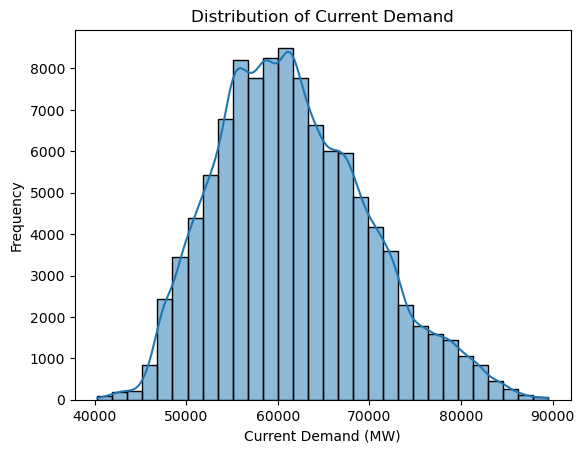

In [10]:
plt.figure()
sns.histplot(power_df['현재수요(MW)'],bins=30,kde=True)
plt.title('Distribution of Current Demand')
plt.xlabel('Current Demand (MW)')
plt.ylabel('Frequency')
plt.show()

### 기준일시 - 현재 수요

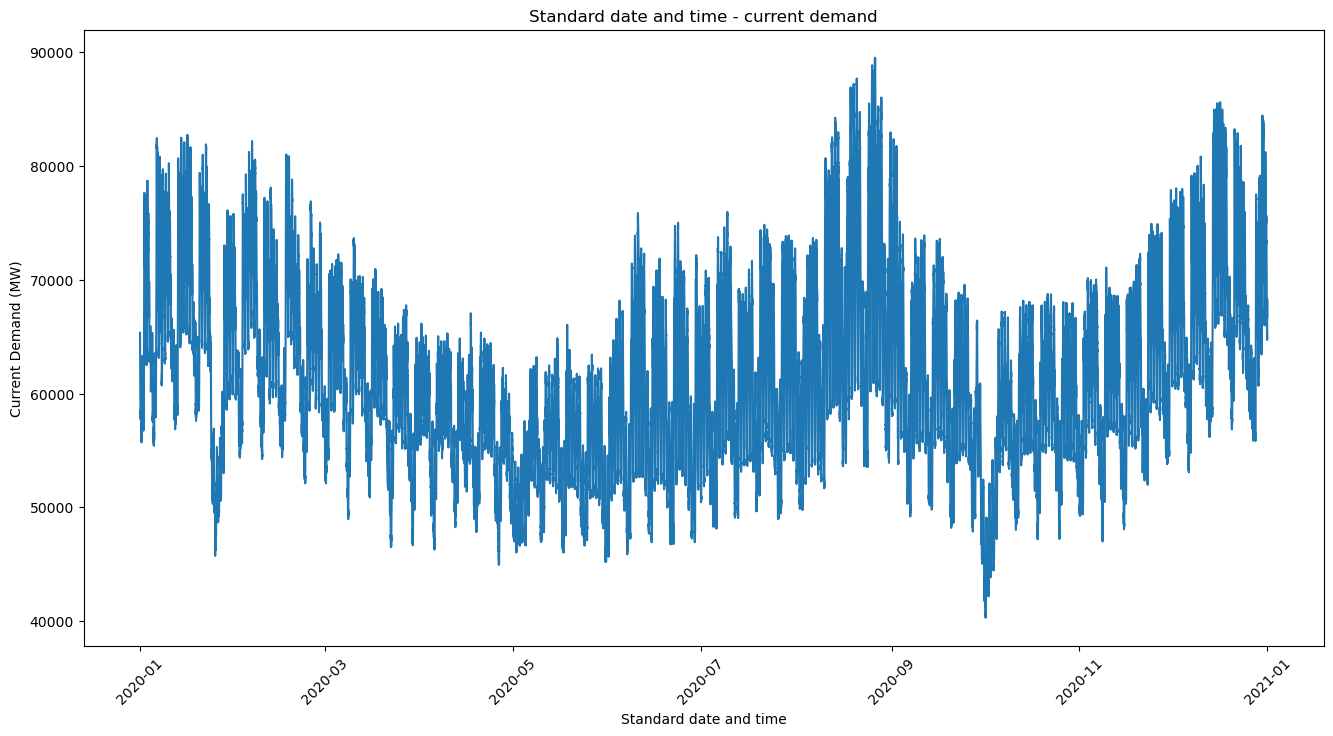

In [11]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='기준일시', y='현재수요(MW)', data=power_df)
plt.title('Standard date and time - current demand')
plt.xlabel('Standard date and time')  # 기준일시
plt.ylabel('Current Demand (MW)')
plt.xticks(rotation=45)  
plt.show()

### 시간대별 '현재 수요' 평균

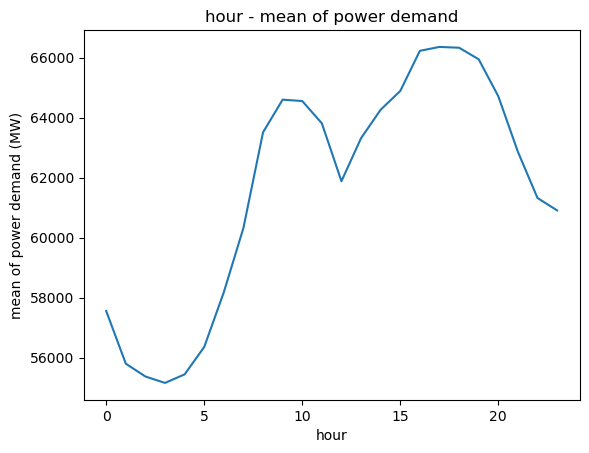

최대 전력 수요를 갖는 시간대: 17.0
해당 월의 평균 전력 수요: 66358.8246539162 MW
최소 전력 수요를 갖는 시간대: 3.0
해당 시간대의 평균 전력 수요: 55159.522575136616 MW


In [12]:
hourly_mean_power_demand = power_df.groupby('hour')['현재수요(MW)'].mean().reset_index()

plt.figure()
sns.lineplot(x='hour', y='현재수요(MW)', data=hourly_mean_power_demand)
plt.title('hour - mean of power demand')
plt.xlabel('hour')
plt.ylabel('mean of power demand (MW)')
plt.show()

max_demand_hour_row = hourly_mean_power_demand.loc[hourly_mean_power_demand['현재수요(MW)'].idxmax()]
max_demand_hour = max_demand_hour_row['hour']
max_demand_value = max_demand_hour_row['현재수요(MW)']

print("최대 전력 수요를 갖는 시간대:", max_demand_hour)
print("해당 월의 평균 전력 수요:", max_demand_value, "MW")

min_demand_hour_row = hourly_mean_power_demand.loc[hourly_mean_power_demand['현재수요(MW)'].idxmin()]
min_demand_hour = min_demand_hour_row['hour']
min_demand_value = min_demand_hour_row['현재수요(MW)']

print("최소 전력 수요를 갖는 시간대:", min_demand_hour)
print("해당 시간대의 평균 전력 수요:", min_demand_value, "MW")

### 월별 '현재 수요' 평균

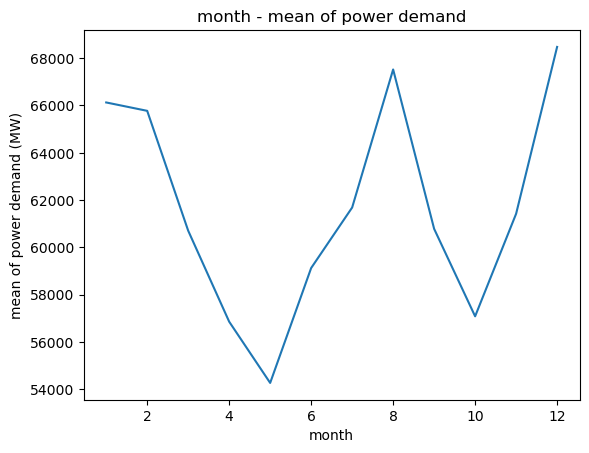

최대 전력 수요를 갖는 월: 12.0
해당 월의 평균 전력 수요: 68476.35399417563 MW
최소 전력 수요를 갖는 월: 5.0
해당 월의 평균 전력 수요: 54271.55016129032 MW


In [13]:
monthly_mean_power_demand = power_df.groupby('month')['현재수요(MW)'].mean().reset_index()

plt.figure()
sns.lineplot(x='month', y='현재수요(MW)', data=monthly_mean_power_demand)
plt.title('month - mean of power demand')
plt.xlabel('month')
plt.ylabel('mean of power demand (MW)')
plt.show()

max_demand_month_row = monthly_mean_power_demand.loc[monthly_mean_power_demand['현재수요(MW)'].idxmax()]
max_demand_month = max_demand_month_row['month']
max_demand_value = max_demand_month_row['현재수요(MW)']

print("최대 전력 수요를 갖는 월:", max_demand_month)
print("해당 월의 평균 전력 수요:", max_demand_value, "MW")

min_demand_month_row = monthly_mean_power_demand.loc[monthly_mean_power_demand['현재수요(MW)'].idxmin()]
min_demand_month = min_demand_month_row['month']
min_demand_value = min_demand_month_row['현재수요(MW)']

print("최소 전력 수요를 갖는 월:", min_demand_month)
print("해당 월의 평균 전력 수요:", min_demand_value, "MW")

### 요일별 '현재 수요' 평균

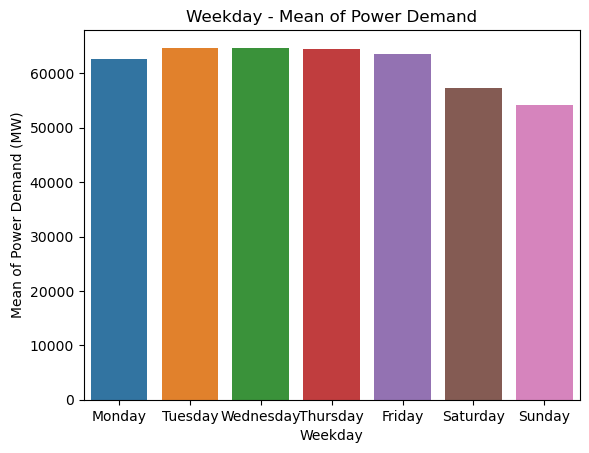

최대 전력을 쓰는 요일: Tuesday, 평균 전력 수요: 64701.473606436964 MW
최소 전력을 쓰는 요일: Sunday, 평균 전력 수요: 54228.66189837073 MW


In [23]:
# '기준일시' 열에서 요일 정보 추출
power_df['weekday'] = power_df['기준일시'].dt.day_name()

# 요일별 평균 현재수요 계산
weekday_mean_power_demand = power_df.groupby('weekday')['현재수요(MW)'].mean().reset_index()

# 그래프 그리기
plt.figure()
sns.barplot(x='weekday', y='현재수요(MW)', data=weekday_mean_power_demand, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday - Mean of Power Demand')
plt.xlabel('Weekday')
plt.ylabel('Mean of Power Demand (MW)')
plt.show()

# 최대 전력을 쓰는 요일
max_demand_day = weekday_mean_power_demand.loc[weekday_mean_power_demand['현재수요(MW)'].idxmax(), 'weekday']
max_demand_value = weekday_mean_power_demand['현재수요(MW)'].max()

# 최소 전력을 쓰는 요일
min_demand_day = weekday_mean_power_demand.loc[weekday_mean_power_demand['현재수요(MW)'].idxmin(), 'weekday']
min_demand_value = weekday_mean_power_demand['현재수요(MW)'].min()

# 결과 출력
print(f"최대 전력을 쓰는 요일: {max_demand_day}, 평균 전력 수요: {max_demand_value} MW")
print(f"최소 전력을 쓰는 요일: {min_demand_day}, 평균 전력 수요: {min_demand_value} MW")

### 연중 각 날짜의 평균 전력 수요

- 1월 1일이 1, 12월 31일이 365(혹은 윤년일 경우 366)로 표시

In [15]:
power_df['day_of_year'] = power_df['기준일시'].dt.dayofyear
mean_power_by_day_of_year = power_df.groupby('day_of_year')['현재수요(MW)'].mean()

print(mean_power_by_day_of_year)

day_of_year
1      59367.924410
2      68869.684722
3      70179.991042
4      63368.492743
5      59239.284549
           ...     
362    58643.494062
363    67117.757500
364    71082.425451
365    75020.231736
366    71495.754132
Name: 현재수요(MW), Length: 366, dtype: float64


 ### '현재수요(MW)' 열 기준 Boxplot

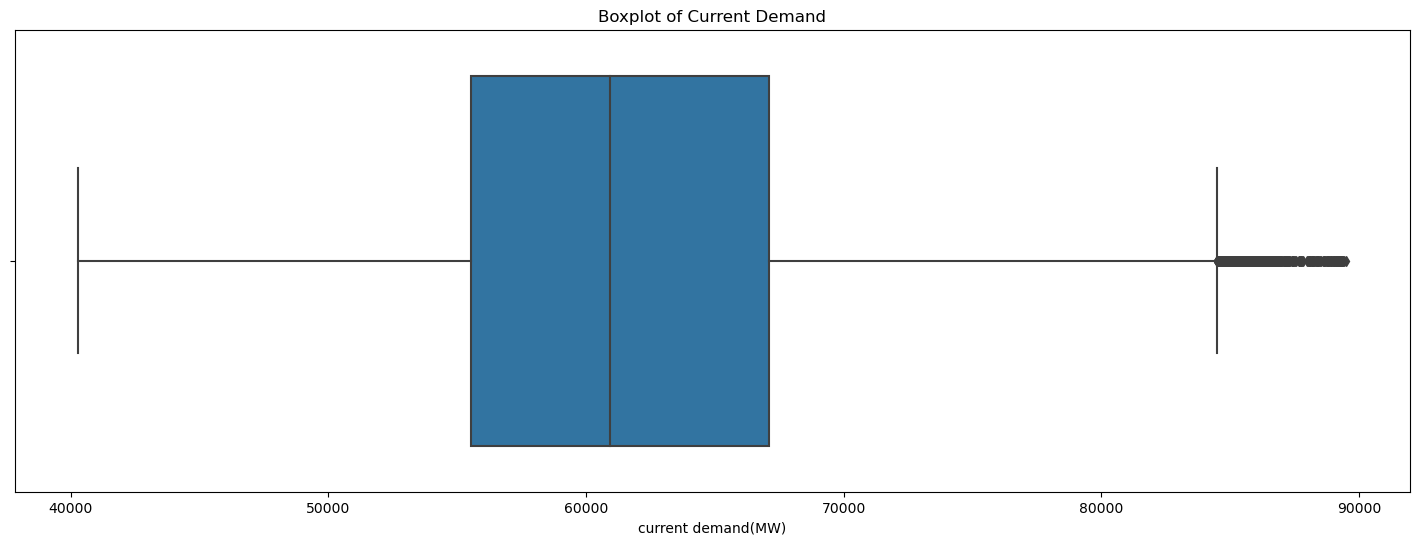

Q3 + IQR: 78695.495
현재수요(MW)가 Q3 + IQR 보다 큰 값의 개수: 3607


In [16]:
plt.figure(figsize=(18, 6))
boxplot = sns.boxplot(x='현재수요(MW)', data=power_df, showfliers=True)
plt.title('Boxplot of Current Demand')
plt.xlabel('current demand(MW)')
plt.show()

# Q3 및 IQR 값 구하기
Q3 = power_df['현재수요(MW)'].quantile(0.75) 
Q1 = power_df['현재수요(MW)'].quantile(0.25) 
IQR = Q3 - Q1 

# Q3 + IQR 값 출력
Q3_plus_IQR = Q3 + IQR
print("Q3 + IQR:", Q3_plus_IQR)
      
count_above_threshold = power_df[power_df['현재수요(MW)'] > Q3_plus_IQR]['현재수요(MW)'].count()

print("현재수요(MW)가 Q3 + IQR 보다 큰 값의 개수:", count_above_threshold)

In [17]:
power_df['현재수요(MW)'].quantile(q=[0.25,0.5,0.75])

0.25    55547.6600
0.50    60916.6800
0.75    67121.5775
Name: 현재수요(MW), dtype: float64

In [18]:
import glob

# 파일 경로 및 파일 이름에 맞게 수정
file_paths = ['./data/2020년 5분 단위 수급현황.csv', './data/2021년 5분 단위 수급현황.csv', './data/2022년 5분 단위 수급현황.csv', './data/2023년 5분 단위 수급현황.csv']

# 각 파일을 읽어와 데이터프레임으로 저장
dfs = [pd.read_csv(file, encoding='cp949') for file in file_paths]

# 데이터프레임을 합치기
merged_power_df = pd.concat(dfs, ignore_index=True)

In [19]:
merged_power_df.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2020-01-01 00:00,96211.0,65340.48,76500,30870.51,47.24561,26796.51,41.01058
1,2020-01-01 00:05,96211.0,65295.67,76500,30915.32,47.34665,26841.32,41.10734
2,2020-01-01 00:10,96211.0,65098.74,76500,31112.25,47.79241,27038.25,41.53422
3,2020-01-01 00:15,96211.0,64927.19,66000,31283.80,48.18289,27209.80,41.90817
4,2020-01-01 00:20,96211.0,64480.83,66000,31730.16,49.20868,27656.16,42.89052


In [20]:
merged_power_df.tail()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
350184,2023-04-30 23:35,76101.03,53828.62,57300,22272.40,41.37651,9389.09,17.44257
350185,2023-04-30 23:40,76084.24,53693.20,57300,22391.04,41.70181,8897.85,16.57166
350186,2023-04-30 23:45,76083.32,52937.98,57300,23145.34,43.72161,9257.95,17.48829
350187,2023-04-30 23:50,76077.47,52679.85,57300,23397.62,44.41474,9303.84,17.66110
350188,2023-04-30 23:55,76072.29,52671.04,57300,23401.25,44.42906,9508.00,18.05166


In [21]:
len(merged_power_df)

350189

In [22]:
merged_power_df.isna().sum()

기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64

plt.figure(figsize=(16, 8))
sns.lineplot(x='기준일시', y='현재수요(MW)', data=merged_power_df)
plt.title('Standard date and time - current demand')
plt.xlabel('Standard date and time')  # 기준일시
plt.ylabel('Current Demand (MW)')
plt.xticks(rotation=45)  
plt.show()